<a href="https://colab.research.google.com/github/HasanMdKamrul/DataScienceProject/blob/main/Upper_confidence_bound(Ads_CTR_Optimisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [ ]:
# In this section we imported all our necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
# Dataset imported but not devide into test and training data since we are dealing with UCB in the whole dataset(which is a simulation data set not the real observation)

In [ ]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

## Implementing UCB

In [ ]:
# Upper confidence Bound
# Step 1 ---> we'll go through all the actions which are ads and find out the best one's conbination, exploration and explotation
# Step 2---> In each round N, we will go through each ad and find out the best upper confidence one 
# Step 3---> We'll choose that ad as the selected ad up to round and find out how many times it was selected up to the round n
# Step 4---> On that selection process up to that round how many times it gets reward we will extract that values as reward and from dataset we find that out, store that value of reward as sum of reward and finally calculate total reward up to that round.

In [8]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward # Up to round n total sum of reward of perticular ad
  total_reward = total_reward + reward # Perticular ads total reward

## Visualising the results

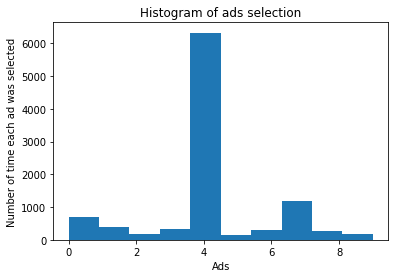

In [9]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of time each ad was selected')
plt.show()